<a href="https://colab.research.google.com/github/junyealim/Homework/blob/main/%EA%B3%BC%EC%A0%9C_%EC%86%8C%EB%93%9D%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://junyealim.tistory.com/90

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cen_df = pd.read_csv('/content/drive/MyDrive/KDT/머신러닝과 딥러닝/data/archive/CENSUS_INCOME.csv')

In [4]:
cen_df

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
cen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE COUNTRY  32561 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* 'AGE': 나이
* 'WORKCLASS': 고용 형태
* 'FNLWGT': 최종 가중치 (Final Weight)
* 'EDUCATION': 교육 수준
* 'EDUCATION-NUM': 교육 수준을 숫자로 표현한 값
* 'MARITAL-STATUS': 결혼 여부 및 가족 형태
* 'OCCUPATION': 직업
* 'RELATIONSHIP': 가족 내 관계
* 'RACE': 인종
* 'SEX': 성별
* 'CAPITAL-GAIN': 자본 이익
* 'CAPITAL-LOSS': 자본 손실
* 'HOURS-PER-WEEK': 주당 근무 시간
* 'NATIVE COUNTRY': 출생 국가
* 'INCOME': 소득 수준 (예: 고소득자, 저소득자)

In [6]:
cen_df['INCOME'].value_counts()

 <=50K    24720
 >50K      7841
Name: INCOME, dtype: int64

In [7]:
cen_df['INCOME'][32560]

' >50K'

In [8]:
# object > int로 바꾸기
# cen_df['INCOME'] = cen_df['INCOME'].apply(lambda x : 0 if x == ' <=50K' else 1)
cen_df['INCOME'] = cen_df['INCOME'].map({' <=50K': 0, ' >50K': 1})

In [9]:
cen_df['INCOME'].value_counts()

0    24720
1     7841
Name: INCOME, dtype: int64

In [10]:
cen_df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
# 'CAPITAL-GAIN', 'CAPITAL-LOSS' 이 두 변수는 소득과 관련이 있지만, 0이 많고 극단값(outliers)을 가질 수 있음. 또한 다른 값으로 대체하기도 어렵기때문에 제외.
cen_df.drop(['CAPITAL-GAIN', 'CAPITAL-LOSS'], axis = 1, inplace=True)

In [12]:
cen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  HOURS-PER-WEEK  32561 non-null  int64 
 11  NATIVE COUNTRY  32561 non-null  object
 12  INCOME          32561 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [13]:
# object컬럼 먼저 살펴보기

In [14]:
cen_df['WORKCLASS'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WORKCLASS, dtype: int64

* Private (사설/기업): 22696명
* Self-emp-not-inc (자영업자-자영업이지만 독립적이지 않음): 2541명
* Local-gov (지방 정부): 2093명
* ? (누락된 값 또는 알 수 없음): 1836명
* State-gov (주 정부): 1298명
* Self-emp-inc (자영업자-독립적): 1116명
* Federal-gov (연방 정부): 960명
* Without-pay (무급 근로): 14명
* Never-worked (근로 경험이 없음): 7명

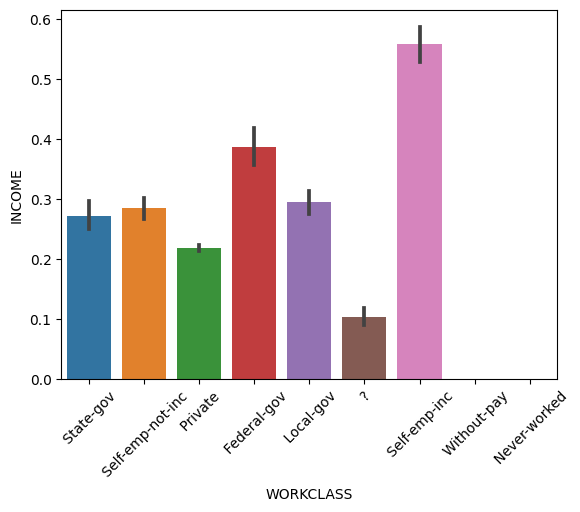

In [15]:
sns.barplot(x='WORKCLASS', y='INCOME', data=cen_df)
plt.xticks(rotation=45)
plt.show()

In [16]:
cen_df['EDUCATION-NUM'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: EDUCATION-NUM, dtype: int64

In [17]:
cen_df['EDUCATION'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: EDUCATION, dtype: int64

- HS-grad: 고등학교 졸업
- Some-college: 대학 중퇴
- Bachelors: 학사 학위
- Masters: 석사 학위
- Assoc-voc: 전문 대학 졸업
- 11th: 11학년
- Assoc-acdm: 전문 대학 학사 학위
- 10th: 10학년
- 7th-8th: 7-8학년
- Prof-school: 전문학교
- 9th: 9학년
- 12th: 12학년
- Doctorate: 박사 학위
- 5th-6th: 5-6학년
- 1st-4th: 1-4학년
- Preschool: 유치원

In [18]:
# 어차피 원 핫 인코딩 하기 때문에 DUCATION-NUM 없앰
cen_df.drop(['EDUCATION-NUM'], axis = 1, inplace=True)

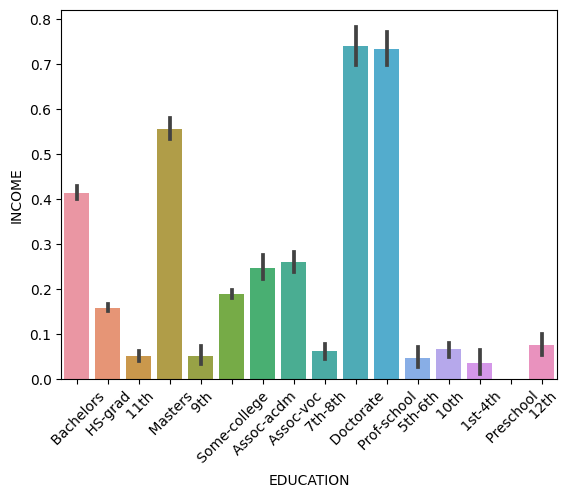

In [19]:
sns.barplot(x='EDUCATION', y='INCOME', data=cen_df)
plt.xticks(rotation=45)
plt.show()

In [20]:
# 박사, 석사, 학사, 7-8학년의 소득이 높음.

In [21]:
obj_list = []
for i in cen_df.columns:
    if cen_df[i].dtype == 'O':
        obj_list.append(i)
obj_list

['WORKCLASS',
 'EDUCATION',
 'MARITAL-STATUS',
 'OCCUPATION',
 'RELATIONSHIP',
 'RACE',
 'SEX',
 'NATIVE COUNTRY']

In [22]:
cen_df[obj_list].nunique()

WORKCLASS          9
EDUCATION         16
MARITAL-STATUS     7
OCCUPATION        15
RELATIONSHIP       6
RACE               5
SEX                2
NATIVE COUNTRY    42
dtype: int64

In [23]:
cen_df['MARITAL-STATUS'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: MARITAL-STATUS, dtype: int64

- Married-civ-spouse (시민 배우자로 결혼함): 시민적인 결혼 상태에서 배우자와 함께 살고 있는 상태
- Never-married (결혼한 적이 없음): 결혼을 한 번도 경험하지 않은 상태
- Divorced (이혼함): 이혼한 상태
- Separated (별거 중): 사실상의 이별 상태로, 혼자 살고 있는 상태
- Widowed (사망한 상태): 배우자가 사망한 상태
- Married-spouse-absent (배우자가 없는 결혼): 결혼은 했지만, 배우자와 떨어져있는 상태
- Married-AF-spouse (미국 군인과의 결혼): 미국 군인과의 결혼 상태

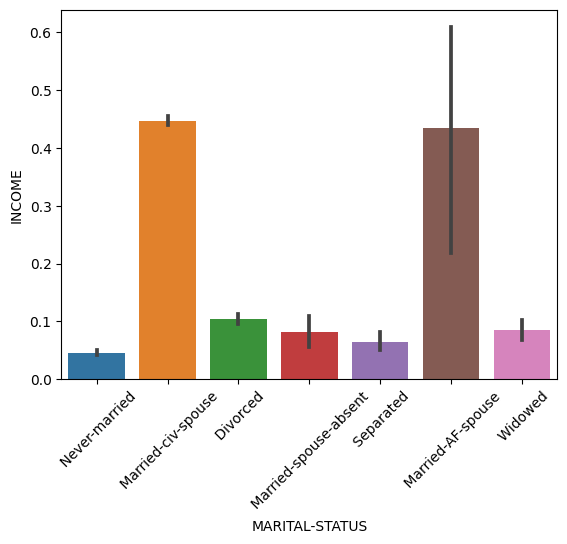

In [24]:
sns.barplot(x='MARITAL-STATUS', y='INCOME', data=cen_df)
plt.xticks(rotation=45)
plt.show()

In [25]:
cen_df['new_MARITAL-STATUS'] = cen_df['MARITAL-STATUS'].apply(lambda x: 'married' if x.strip() in ['Married-civ-spouse','Married-AF-spouse'] else 'Never_married' if x.strip() == 'Never-married' else 'etc')

In [26]:
cen_df

,AGE,WORKCLASS,FNLWGT,EDUCATION,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,new_MARITAL-STATUS
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,Never_married
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,married
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,etc
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,married
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,married
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,married
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,etc
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,Never_married


In [27]:
cen_df.drop(['MARITAL-STATUS'], axis = 1, inplace=True)
cen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGE                 32561 non-null  int64 
 1   WORKCLASS           32561 non-null  object
 2   FNLWGT              32561 non-null  int64 
 3   EDUCATION           32561 non-null  object
 4   OCCUPATION          32561 non-null  object
 5   RELATIONSHIP        32561 non-null  object
 6   RACE                32561 non-null  object
 7   SEX                 32561 non-null  object
 8   HOURS-PER-WEEK      32561 non-null  int64 
 9   NATIVE COUNTRY      32561 non-null  object
 10  INCOME              32561 non-null  int64 
 11  new_MARITAL-STATUS  32561 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


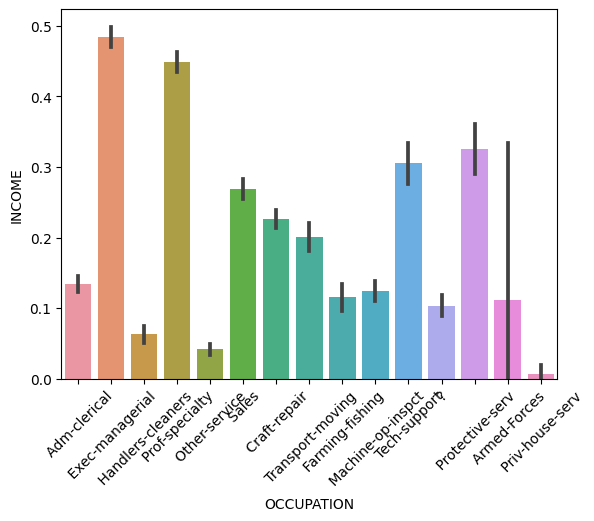

In [28]:
sns.barplot(x='OCCUPATION', y='INCOME', data=cen_df)
plt.xticks(rotation=45)
plt.show()

In [29]:
cen_df['OCCUPATION'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: OCCUPATION, dtype: int64

<ipython-input-30-55fcc93a2dde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cen_df.corr(),cmap='coolwarm', vmin= -1, vmax=1, annot=True)


<Axes: >

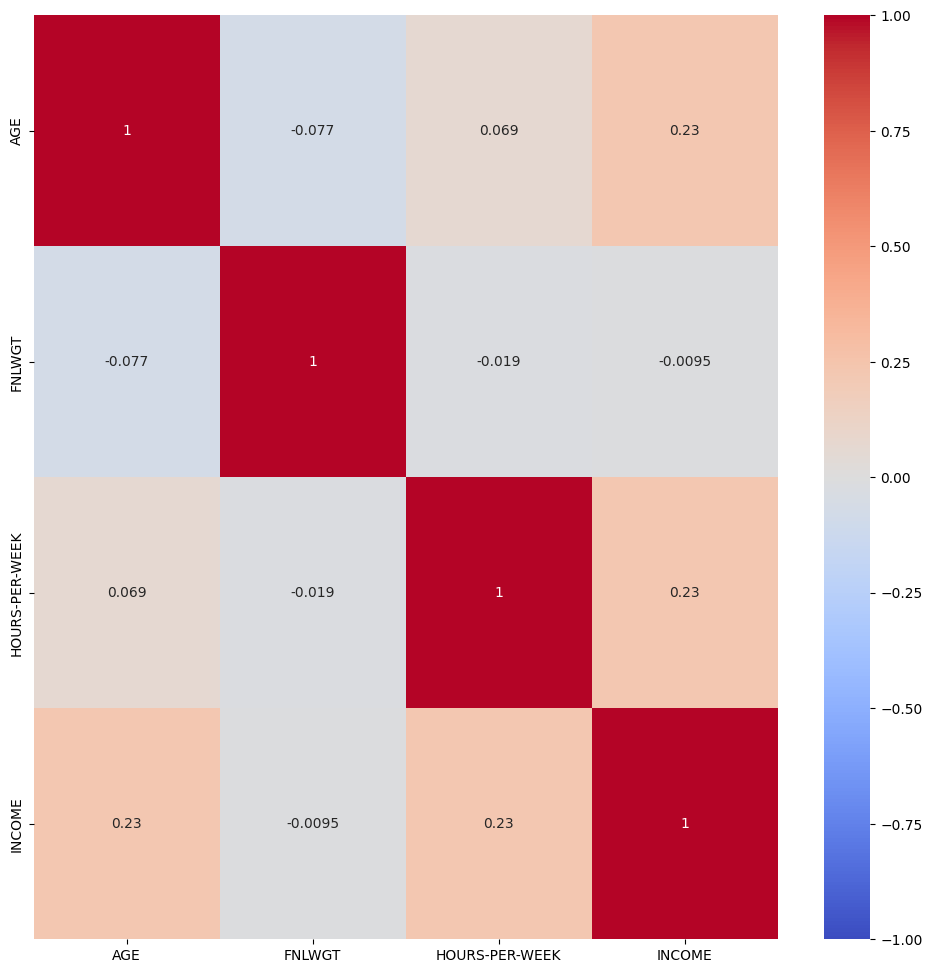

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(cen_df.corr(),cmap='coolwarm', vmin= -1, vmax=1, annot=True)

In [31]:
# cen_df['FNLWGT']는 FNLWGT 표본이 전체 인구를 얼마나 잘 대표하는지를 나타내는 가중치입니다.각각의 관측치(개별 데이터 포인트)에는 FNLWGT가 부여되어 있습니다.
# 개별 데이터에 이미 부여되어 있는 값이기 때문에 corr()로 살펴본 컬럼간 관계에서 FNLWGT 자체와 INCOME의 관계는 거의 없음.
# 우선은 drop 진행.

In [32]:
cen_df.drop(['FNLWGT'], axis = 1, inplace=True)
cen_df.describe()

,AGE,HOURS-PER-WEEK,INCOME
count,32561.000000,32561.000000,32561.000000
mean,38.581647,40.437456,0.240810
std,13.640433,12.347429,0.427581
min,17.000000,1.000000,0.000000
25%,28.000000,40.000000,0.000000
50%,37.000000,40.000000,0.000000
75%,48.000000,45.000000,0.000000
max,90.000000,99.000000,1.000000


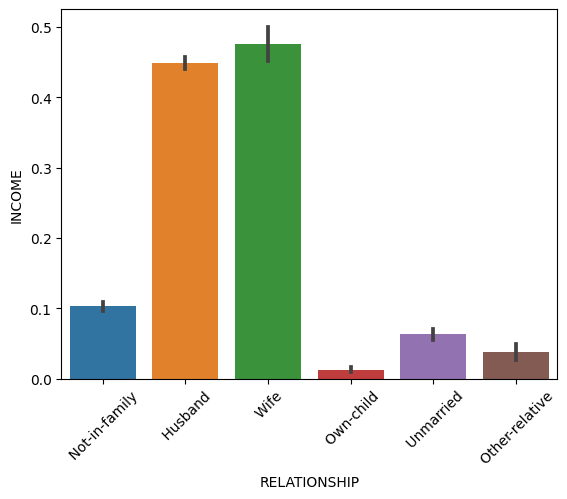

In [33]:
sns.barplot(x='RELATIONSHIP', y='INCOME', data=cen_df)
plt.xticks(rotation=45)
plt.show()

In [34]:
cen_df['RELATIONSHIP'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: RELATIONSHIP, dtype: int64

<Axes: >

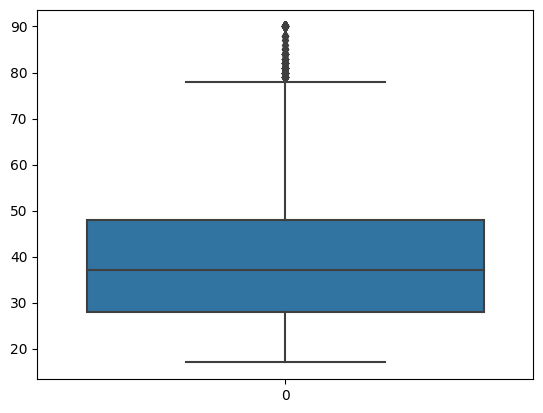

In [35]:
sns.boxplot(cen_df['AGE'])

<Axes: xlabel='AGE', ylabel='INCOME'>

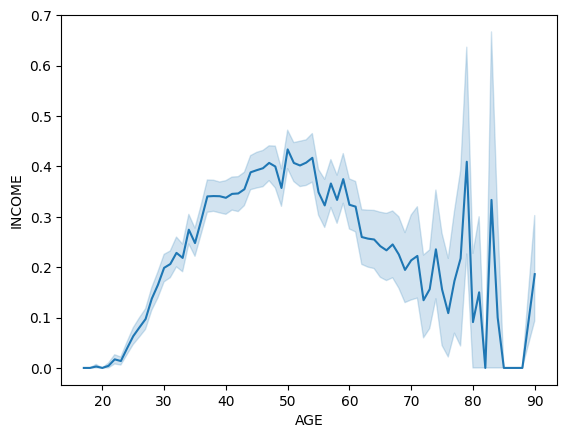

In [36]:
sns.lineplot(x = 'AGE', y = 'INCOME', data = cen_df)

In [37]:
# 어느정도 소득을 가질 수 있는 연령대가 소득이 높음. RELATIONSHIP에서 소득이 있을 만한 연령대의 Husband, Wife의 소득이 높은 것과 비슷한 이치.

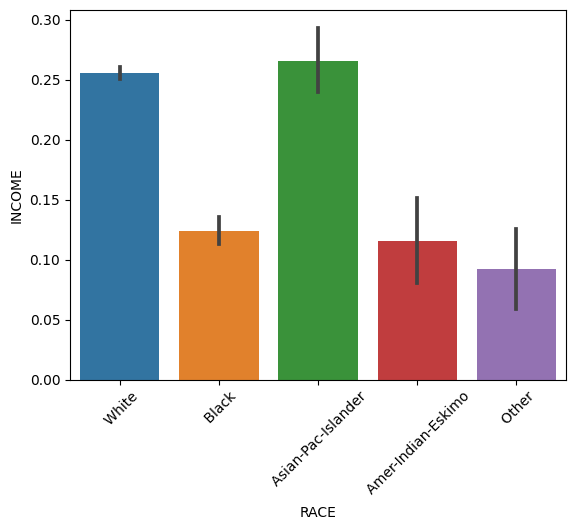

In [38]:
sns.barplot(x='RACE', y='INCOME', data=cen_df)
plt.xticks(rotation=45)
plt.show()

In [39]:
cen_df['RACE'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: RACE, dtype: int64

- White (백인)
- Black (흑인)
- Asian-Pac-Islander (아시안-태평양 섬 주민)
- Amer-Indian-Eskimo (아메리칸 인디언 및 에스키모)
- Other (기타)

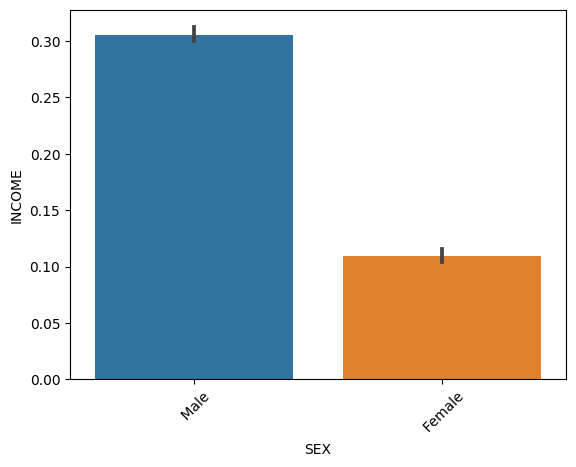

In [40]:
sns.barplot(x='SEX', y='INCOME', data=cen_df)
plt.xticks(rotation=45)
plt.show()

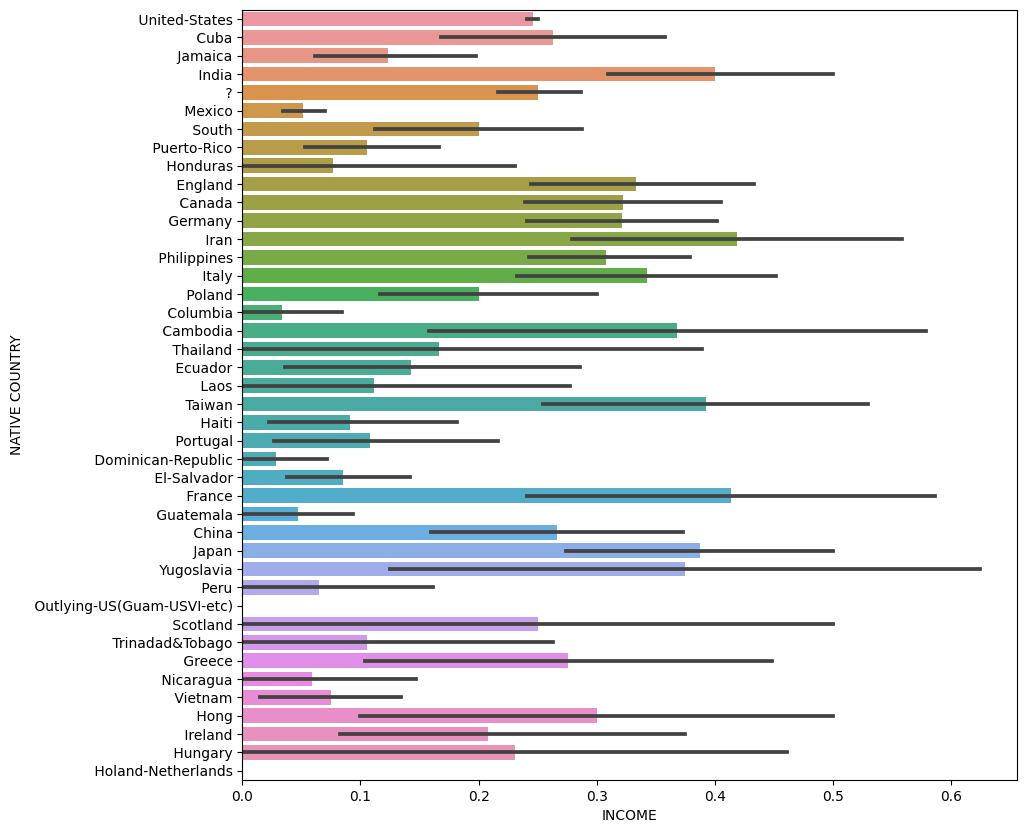

In [41]:
plt.figure(figsize=(10, 10))
sns.barplot(x='INCOME', y='NATIVE COUNTRY', data=cen_df)
plt.show()

In [42]:
cen_df['NATIVE COUNTRY'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

- 데이터가 크게 불균형함.(미국 데이터가 다른 나라 데이터에 비해 월등히 많음.)
- 다른 국가들을 모두 하나의 그룹으로 묶기에는 해당 국가들 간의 차이를 놓치게 될 수 있음.


In [43]:
cen_df.drop(['NATIVE COUNTRY'], axis = 1, inplace=True)

In [44]:
obj_list = []
for i in cen_df.columns:
    if cen_df[i].dtype == 'O':
        obj_list.append(i)
obj_list

['WORKCLASS',
 'EDUCATION',
 'OCCUPATION',
 'RELATIONSHIP',
 'RACE',
 'SEX',
 'new_MARITAL-STATUS']

In [45]:
# 원 핫 인코딩
cen_df = pd.get_dummies(cen_df, columns = obj_list)
cen_df.head()

,AGE,HOURS-PER-WEEK,INCOME,WORKCLASS_ ?,WORKCLASS_ Federal-gov,WORKCLASS_ Local-gov,WORKCLASS_ Never-worked,WORKCLASS_ Private,WORKCLASS_ Self-emp-inc,WORKCLASS_ Self-emp-not-inc,...,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ Other,RACE_ White,SEX_ Female,SEX_ Male,new_MARITAL-STATUS_Never_married,new_MARITAL-STATUS_etc,new_MARITAL-STATUS_married
0,39,40,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,50,13,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
2,38,40,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
3,53,40,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,28,40,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(cen_df.drop('INCOME', axis = 1), cen_df['INCOME'], test_size = 0.25, random_state=2023)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24420, 58) (24420,)
(8141, 58) (8141,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Classification 모델들
lr = LogisticRegression()
dtr = DecisionTreeClassifier(random_state=2023)
rf = RandomForestClassifier()
svm = SVC()
base_model = LGBMClassifier(random_state=2023)

In [49]:
lr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train,y_train)
base_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5884, number of negative: 18536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 264
[LightGBM] [Info] Number of data points in the train set: 24420, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240950 -> initscore=-1.147478
[LightGBM] [Info] Start training from score -1.147478


LGBMClassifier(random_state=2023)

In [50]:
pred_lr = lr.predict(X_test)
pred_dtr = dtr.predict(X_test)
pred_rf = rf.predict(X_test)
pred_svm = svm.predict(X_test)
pred_base_model = base_model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [52]:
print(accuracy_score(y_test, pred_lr))
print(accuracy_score(y_test, pred_dtr))
print(accuracy_score(y_test, pred_rf))
print(accuracy_score(y_test, pred_svm))
print(accuracy_score(y_test, pred_base_model))

0.8369979118044466
0.780002456700651
0.81722147156369
0.8104655447733694
0.8467018793759981


In [53]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6184
           1       0.70      0.57      0.63      1957

    accuracy                           0.84      8141
   macro avg       0.78      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



In [54]:
print(classification_report(y_test, pred_dtr))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6184
           1       0.54      0.52      0.53      1957

    accuracy                           0.78      8141
   macro avg       0.70      0.69      0.69      8141
weighted avg       0.78      0.78      0.78      8141



In [55]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6184
           1       0.64      0.56      0.60      1957

    accuracy                           0.82      8141
   macro avg       0.75      0.73      0.74      8141
weighted avg       0.81      0.82      0.81      8141



In [56]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6184
           1       0.75      0.32      0.45      1957

    accuracy                           0.81      8141
   macro avg       0.78      0.64      0.67      8141
weighted avg       0.80      0.81      0.78      8141



In [57]:
print(classification_report(y_test, pred_base_model))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6184
           1       0.71      0.60      0.65      1957

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [58]:
proba1 = lr.predict_proba(X_test)
print(roc_auc_score(y_test, proba1[:, 1]))

proba2 = dtr.predict_proba(X_test)
print(roc_auc_score(y_test, proba2[:, 1]))

proba3 = rf.predict_proba(X_test)
print(roc_auc_score(y_test, proba3[:, 1]))

print(accuracy_score(y_test, pred_svm))

proba5 = base_model.predict_proba(X_test)
print(roc_auc_score(y_test, proba5[:, 1]))

0.8871174131273877
0.7163465097923598
0.8552542751300437
0.8104655447733694
0.8946733819816879


🧡결과가 가장 좋게 나온 LogisticRegression와 LGBMClassifier만 하이퍼파라미터 튜닝 진행

In [59]:
# LogisticRegression 하이퍼 파라미터 튜닝. 거의 원 핫 인코딩 값이라 스케일링은 생략.
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore',message='warnings')

param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [200, 300, 500, 1000],
    'warm_start' : [True, False]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(lr, param_dist, n_iter=50, cv=5, random_state=2023)

# Perform RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'warm_start': True, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'C': 1}


- solver : 알고리즘 지정.
- C : 정규화 강도의 역수를 나타냅니다. 작은 값일수록 강력한 정규화를 의미
- penalty : 정규화 항의 종류를 지정
- max_iter : 솔버(알고리즘)가 수렴하는 데 필요한 최대 반복 횟수

In [69]:
# iter=20
# final_lr = LogisticRegression(warm_start= False, solver='lbfgs', penalty='none', max_iter=200, C=10)
# iter=50
#final_lr = LogisticRegression(warm_start= True, solver='lbfgs', penalty='none', max_iter=300, C=1)
final_lr = LogisticRegression(warm_start= True, solver='lbfgs', penalty='none', max_iter=300, C=1)
final_lr.fit(X_train, y_train)
final_pred_lr = final_lr.predict(X_test)

accuracy_score(y_test, final_pred_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.837612086967203

In [70]:
best_logistic_regression = random_search.best_estimator_

# Evaluate the best model on the test set
best_predictions = best_logistic_regression.predict(X_test)

# Print the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, best_predictions))

proba_best = final_lr.predict_proba(X_test)
print("roc_auc_score:", roc_auc_score(y_test, proba_best[:, 1]))

print("Accuracy:", accuracy_score(y_test, best_predictions) - accuracy_score(y_test, pred_lr), '만큼 좋아짐')
print("roc_auc_score:", roc_auc_score(y_test, proba_best[:, 1]) - roc_auc_score(y_test, proba1[:, 1]), '만큼 좋아짐')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy: 0.8448593538877288
roc_auc_score: 0.8888105093930898
Accuracy: 0.00786144208328221 만큼 좋아짐
roc_auc_score: 0.001693096265702132 만큼 좋아짐


In [75]:
# LGBMClassifier 하이퍼파라미터 튜닝
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10, -1],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'num_leaves': [31, 50, 100],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
random_search = RandomizedSearchCV(base_model, param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=2023)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

- n_estimators:트리의 개수입니다.
- learning_rate:각 트리의 기여도를 줄이는 역할을 하는 값으로, 작은 값일수록 보수적인 모델이 됩니다.
- max_depth:트리의 최대 깊이를 나타냅니다. -1로 설정하면 깊이에 제한을 두지 않습니다.
- min_child_samples:리프 노드에서 필요한 최소 샘플 수입니다.
- subsample:각 트리를 학습할 때 사용하는 샘플의 비율입니다.
- colsample_bytree:각 트리를 학습할 때 사용하는 특성의 비율입니다.
- reg_alpha: L1 정규화 항의 강도를 조절하는 매개변수입니다.
- reg_lambda: L2 정규화 항의 강도를 조절하는 매개변수입니다.

In [76]:
# 50
# best_p= {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
# 20
# best_p= {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_samples': 5, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
best_p= {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
final_model = LGBMClassifier(random_state = 2023, **best_p)
final_model.fit(X_train, y_train)
final_pred_model = final_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, final_pred_model))

proba_best_model = final_model.predict_proba(X_test)
print(roc_auc_score(y_test, proba_best_model[:, 1]))

print("Accuracy:", accuracy_score(y_test, final_pred_model) - accuracy_score(y_test, pred_base_model), '만큼 좋아짐')
print("roc_auc_score:", roc_auc_score(y_test, proba_best_model[:, 1]) - roc_auc_score(y_test, proba5[:, 1]), '만큼 좋아짐')

# n_iter=50으로 추천받은 best parameters보다 n_iter=20으로 추천받은 best parameters의 결과가 더 좋음.
# 과적합때문으로 예상됨.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5884, number of negative: 18536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 24420, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240950 -> initscore=-1.147478
[LightGBM] [Info] Start training from score -1.147478
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num

In [ ]:
# Accuracy: 0.8448593538877288
# [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
# 0.8961136293175195
# Accuracy: -0.0018425254882692421 만큼 좋아짐
# roc_auc_score: 0.0014402473358315904 만큼 좋아짐

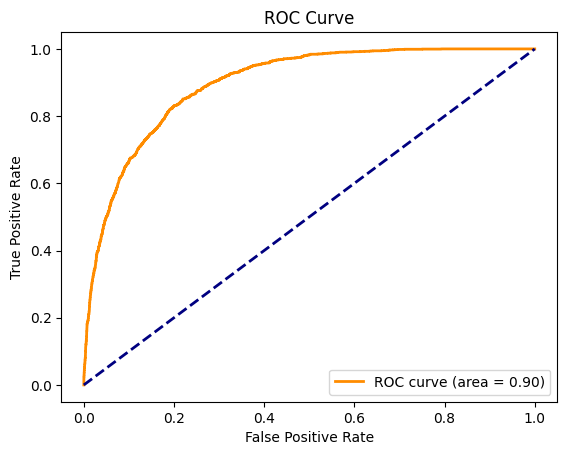

In [77]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
y_probs=proba_best_model[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
pd.DataFrame(final_pred_model).value_counts()

0    6506
1    1635
dtype: int64

# stacking 적용해보기

In [81]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 개별 모델 정의
base_models = [
    ('lr', LogisticRegression(warm_start= True, solver='lbfgs', penalty='none', max_iter=300, C=1)),
    ('dtr', DecisionTreeClassifier(random_state=2023)),
    ('rf', RandomForestClassifier()),
    ('svm', SVC())
]

# 최종 모델 정의 (LGBMClassifier)
final_model = LGBMClassifier(random_state=2023, **best_p)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_model)
stacking_model.fit(X_train_scaled, y_train)
stacking_pred = stacking_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, stacking_pred)
print(f"Stacking 모델 정확도: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:45

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5884, number of negative: 18536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 24420, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240950 -> initscore=-1.147478
[LightGBM] [Info] Start training from score -1.147478
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Stacking 모델 정확도: 0.8361380665765876


In [82]:
proba_best_model = stacking_model.predict_proba(X_test_scaled)
print(roc_auc_score(y_test, proba_best_model[:, 1]))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8879899485113644
